In [15]:
# Load the necessary libraries
if (!require(quantmod)) install.packages("quantmod")
if (!require(xts)) install.packages("xts")
if (!require(zoo)) install.packages("zoo")
library(quantmod)
library(xts)
library(zoo)

# Download AAPL stock price data
getSymbols("^GSPC", src = "yahoo", from = "2000-01-01", to = "2023-01-01")
Sp500_prices <- Ad(GSPC)  # Extract adjusted close prices
class(Sp500_prices)  # This will show it as an `xts` object

# Convert `xts` to `zoo`
AAPL_zoo <- as.zoo(Sp500_prices)

[1] "GSPC"

[1] "xts" "zoo"

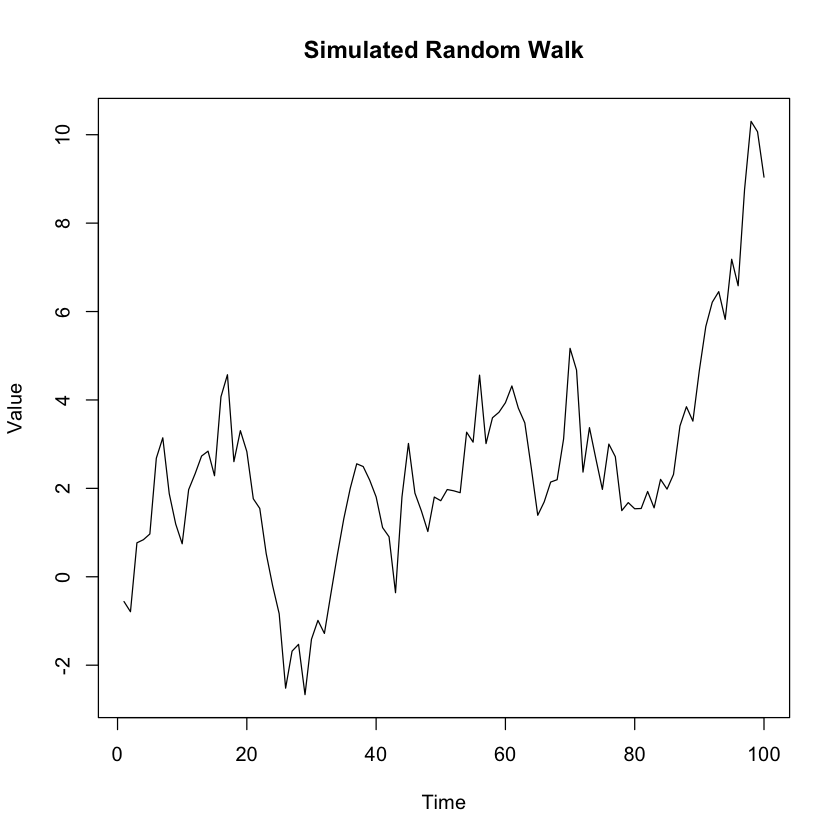

In [16]:
set.seed(123)
n <- 100
epsilon <- rnorm(n)
random_walk <- cumsum(epsilon)

# Plot the random walk
plot(random_walk, type = "l", main = "Simulated Random Walk", ylab = "Value", xlab = "Time")

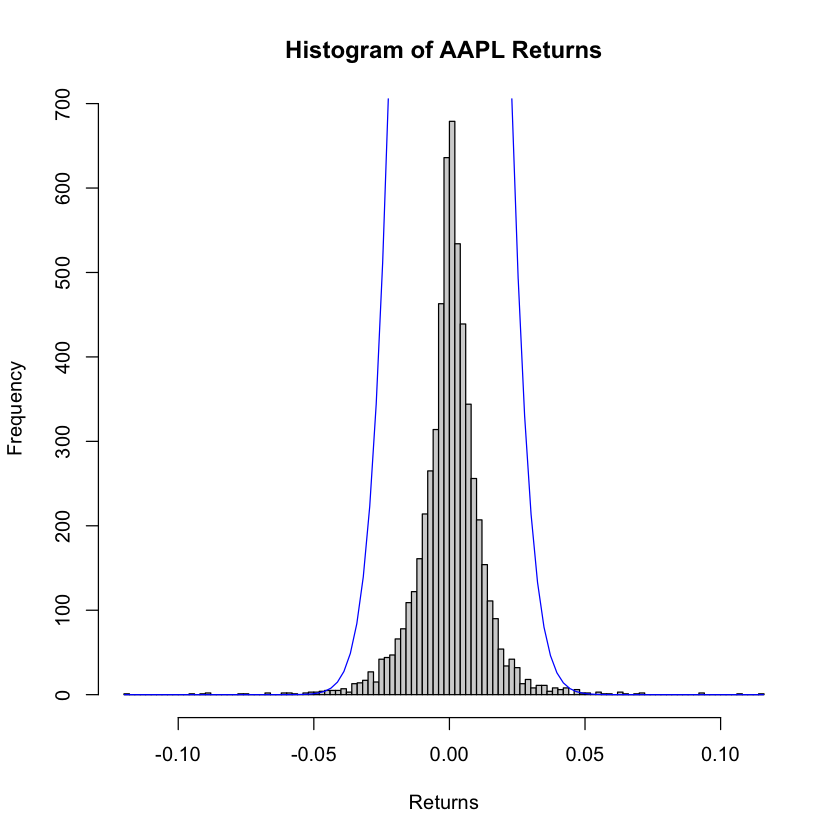

In [17]:
returns =quantmod::dailyReturn(Sp500_prices)

# Plotting the histogram of returns (empirical distribution)
hist(returns, breaks = 100, main = "Histogram of AAPL Returns", xlab = "Returns")

# Add a normal distribution curve for comparison
x_vals <- seq(min(returns), max(returns), length=100)
normal_vals <- dnorm(x_vals, mean = mean(returns), sd = sd(returns))
lines(x_vals, normal_vals * diff(hist(returns, plot=FALSE)$breaks[1:2]) * length(returns), col="blue")

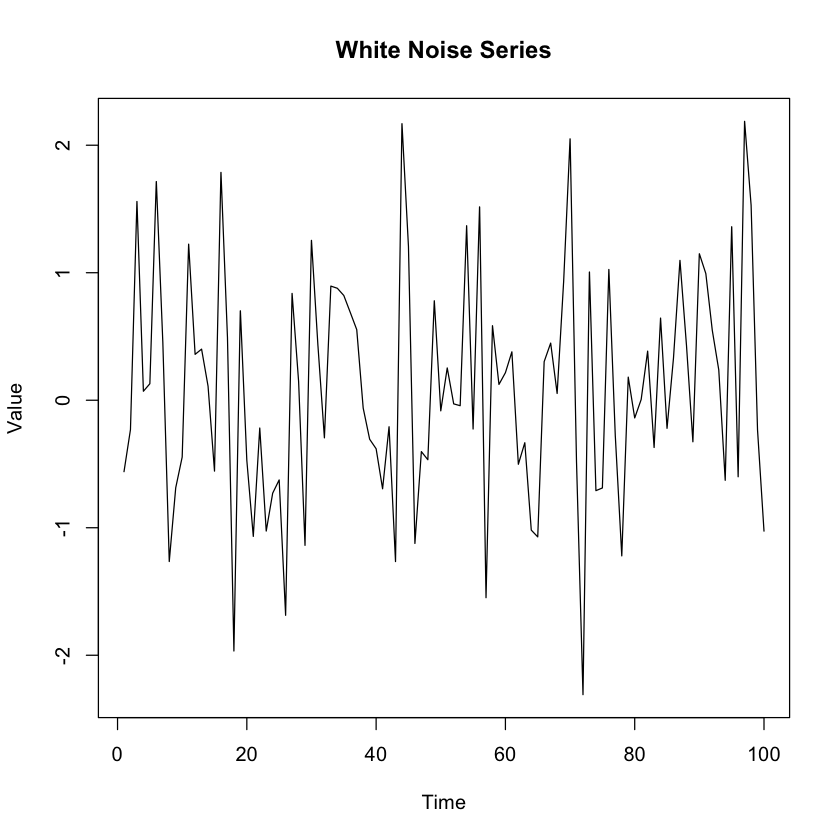

In [18]:
# Generate a white noise series
set.seed(123)
white_noise <- rnorm(100, mean = 0, sd = 1)

# Plot the white noise
plot(white_noise, type = "l", main = "White Noise Series", ylab = "Value", xlab = "Time")

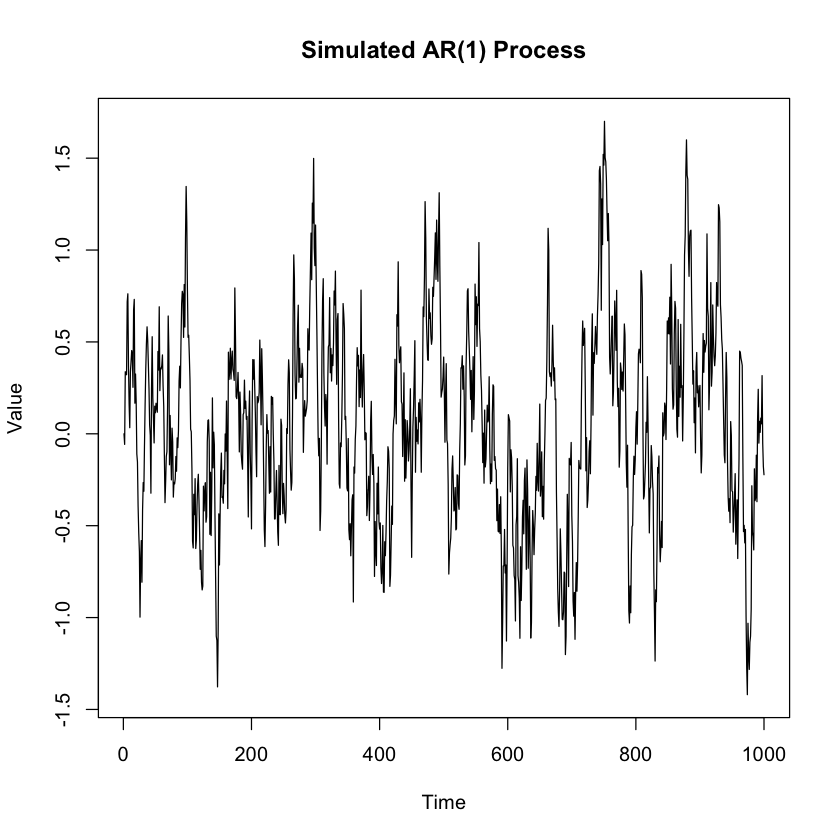

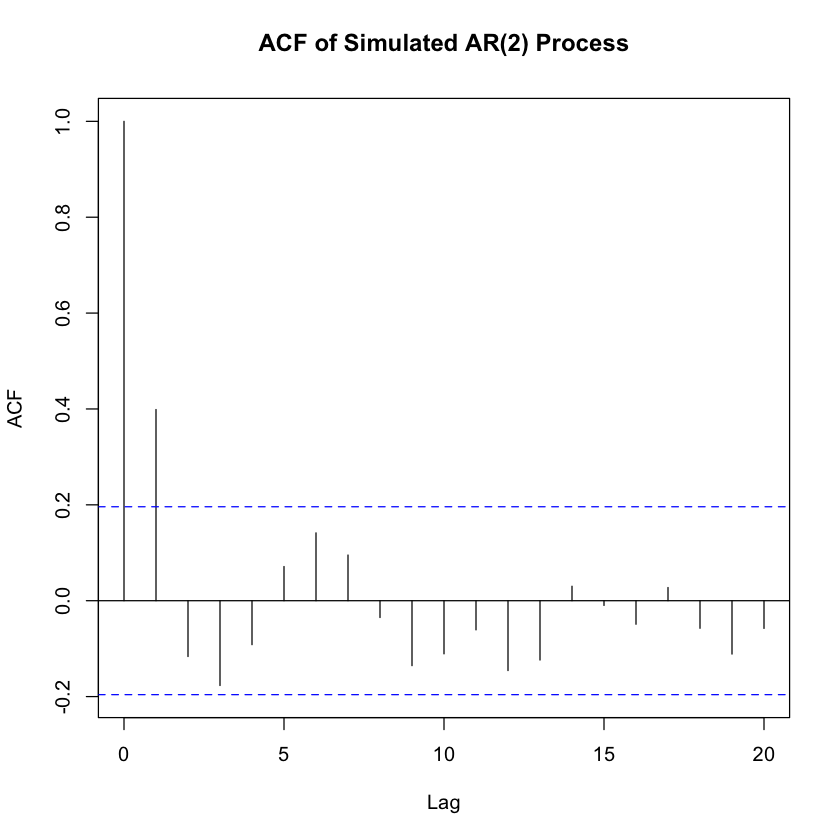

In [19]:
set.seed(123)
n <- 1000
phi <- 0.9
epsilon <- rnorm(n, mean = 0, sd = 0.25)
X <- numeric(n)
X[1] <- 0  # starting point

for (t in 2:n) {
  X[t] <- phi * X[t-1] + epsilon[t]
}

# Plot the AR(1) process
plot(X, type="l", main="Simulated AR(1) Process", ylab="Value", xlab="Time")

acf(ar2_process, main = "ACF of Simulated AR(2) Process")

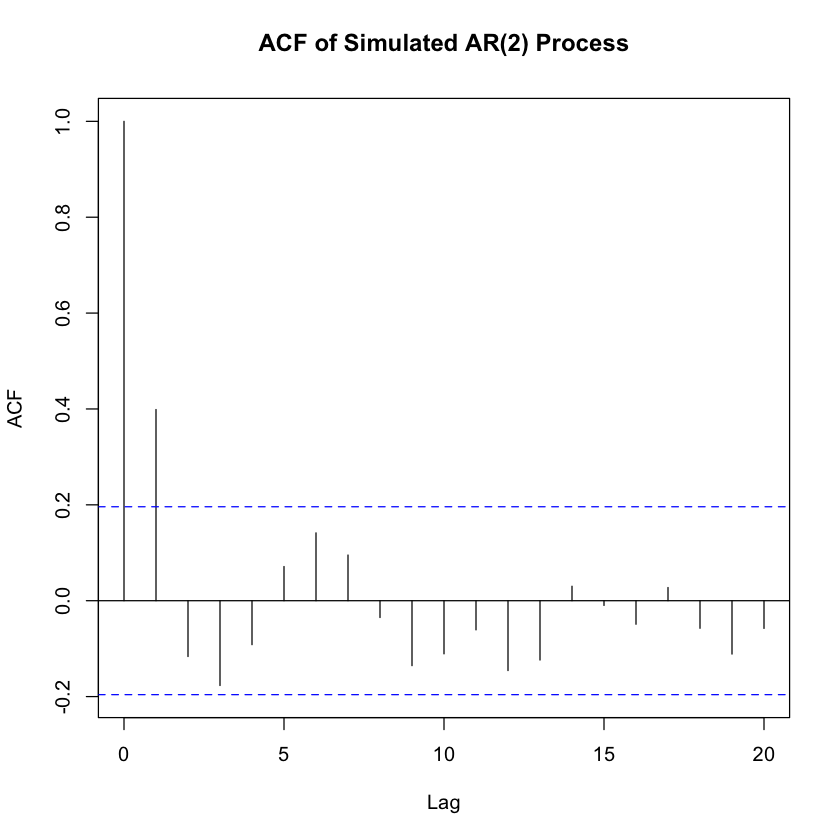

In [20]:
set.seed(123)
ar2_process <- arima.sim(n = 100, model = list(ar = c(0.6, -0.4)))
acf(ar2_process, main = "ACF of Simulated AR(2) Process")

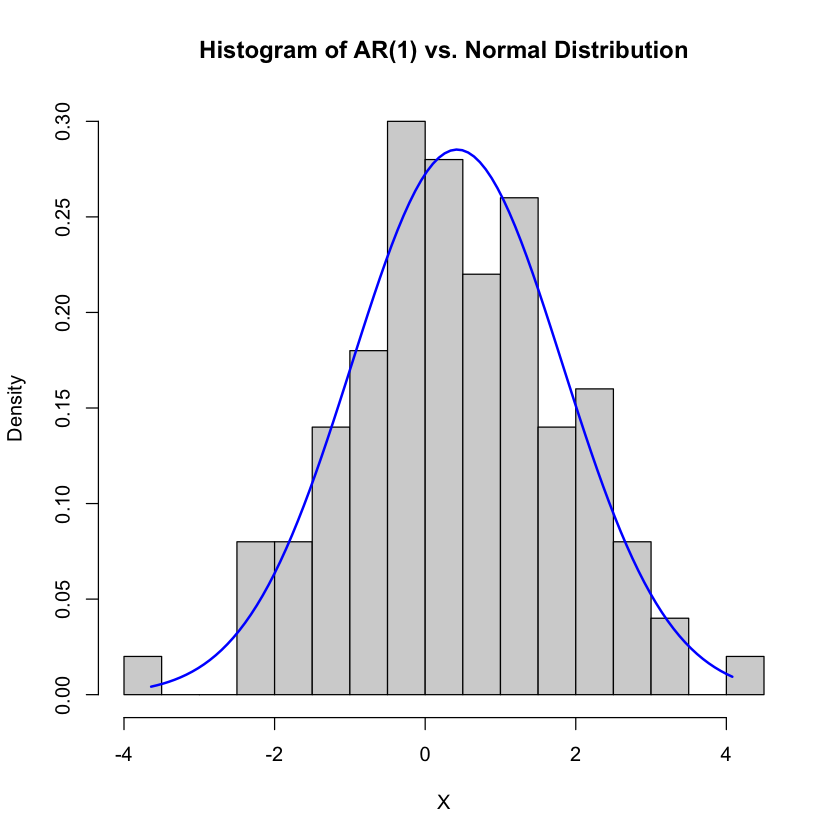

In [21]:
# Simulating an AR(1) process
set.seed(123)
n <- 100
phi <- 0.8
epsilon <- rnorm(n)
X <- numeric(n)
X[1] <- 0  # starting point

for (t in 2:n) {
  X[t] <- phi * X[t-1] + epsilon[t]
}

# Histogram of AR(1) Process
hist(X, breaks=20, probability=TRUE, main="Histogram of AR(1) vs. Normal Distribution")

# Add a normal distribution curve for comparison
x_vals <- seq(min(X), max(X), length=100)
normal_vals <- dnorm(x_vals, mean=mean(X), sd=sd(X))
lines(x_vals, normal_vals, col="blue", lwd=2)